In [1]:
#import primary modules
import numpy as np 
import pandas as pd 
#import matplotlib & inline
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


Dataset: Immigration to Canada from 1980 to 2013 - from United Nation's website. 
source : https://www.un.org/development/desa/pd/data/international-migration-flows?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01

In [2]:
#Data read into a pandas dataframe
df = pd.read_csv('canadian_immegration_data.csv')

In [3]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


1. cleaning and changing formats

In [4]:
#Print the dimensinos of the dataframe
print(df.shape)

(195, 39)


In [5]:
#Checking data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

no unlls are found

In [6]:
#For easier plotting, setting the country name as index
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
# create a new column of 'total number of immigration' for more plotting
df['total'] = df.sum(axis=1)
#create a list of years from 1980-2013 for handy plotting the data
years = list(map(str, range(1980, 2014)))
df.head()

C:\Users\jjooh\AppData\Local\Temp\ipykernel_17400\3129508386.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,856,702,560,716,561,539,620,603,15699,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,1,0,0,0,0,1,1,15,30


In [8]:
#fixing mistake
df.drop(['Total'], axis = 1 , inplace = True)

let's a pie chart to exlore the proportion of new immigrants grouped by continents from entire time period from 1980 to 2013

In [9]:
#Group countries by continents 
df_con = df.groupby('Continent', axis = 0).sum() 
df_con.head()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284


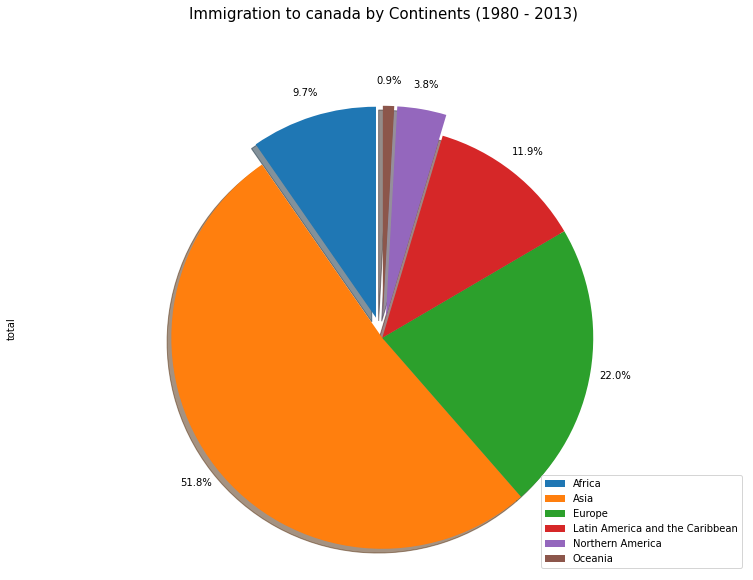

In [30]:
explode = [0.1, 0, 0, 0, 0.1, 0.1]
#pie chart of total immigrations proportion by its continents
df_con['total'].plot(kind = 'pie', figsize = (13,9), 
                     autopct = '%1.1f%%', startangle = 90, 
                     shadow = True,  pctdistance = 1.12, 
                     labels = None, explode = explode)


plt.title('Immigration to canada by Continents (1980 - 2013)' , y = 1.12, fontsize = 15)
plt.axis('equal')
plt.legend ( labels = df_con.index, loc = 'lower right')
plt.show()

let's make a piechart for 2013 year only 

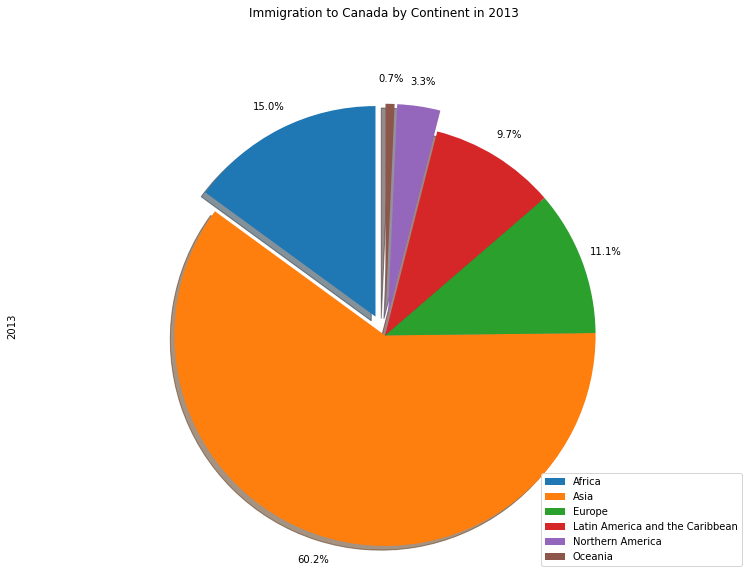

In [31]:
explode = [0.1, 0, 0, 0, 0.1, 0.1]

df_con['2013'].plot(kind = 'pie', figsize = (13,9), 
                     autopct = '%1.1f%%', startangle = 90, 
                     shadow = True,  pctdistance = 1.12, 
                     labels = None, explode = explode)

plt.title('Immigration to Canada by Continent in 2013', y = 1.12)
plt.axis ('equal')
plt.legend(labels = df_con.index, loc='lower right')
plt.show()

In [11]:
# list of countries 
index_objects = list(df.index)
print(index_objects)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ger

Let's compare Korean and Japanese immigrants between 1980 - 2013 by using a box plot

In [12]:
#dataframe of immigration from Republic of Korea and Japan 
df_kj = df.loc[['Republic of Korea', 'Japan'], years].transpose()
df_kj.head()

Country,Republic of Korea,Japan
1980,1011,701
1981,1456,756
1982,1572,598
1983,1081,309
1984,847,246


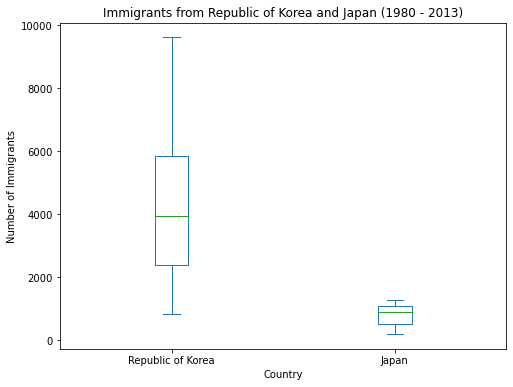

In [13]:
#box plot
df_kj.plot(kind ='box', figsize = (8,6))
plt.title('Immigrants from Republic of Korea and Japan (1980 - 2013)')
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.show()

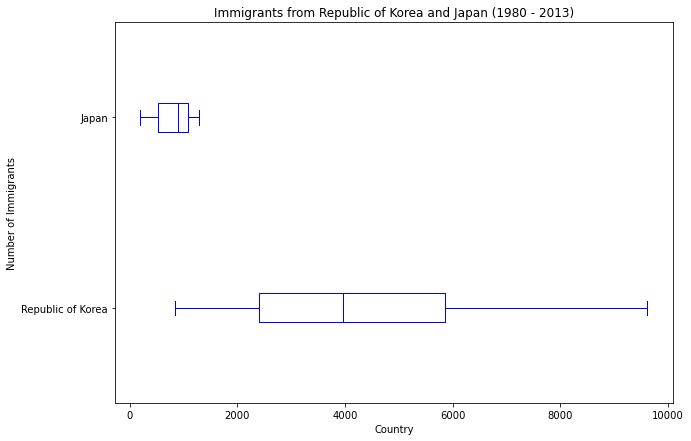

In [14]:
#Horizontal version 
df_kj.plot(kind ='box', figsize = (10,7), color = 'blue', vert = False)
plt.title('Immigrants from Republic of Korea and Japan (1980 - 2013)')
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.show()

adding linechart by using subplot

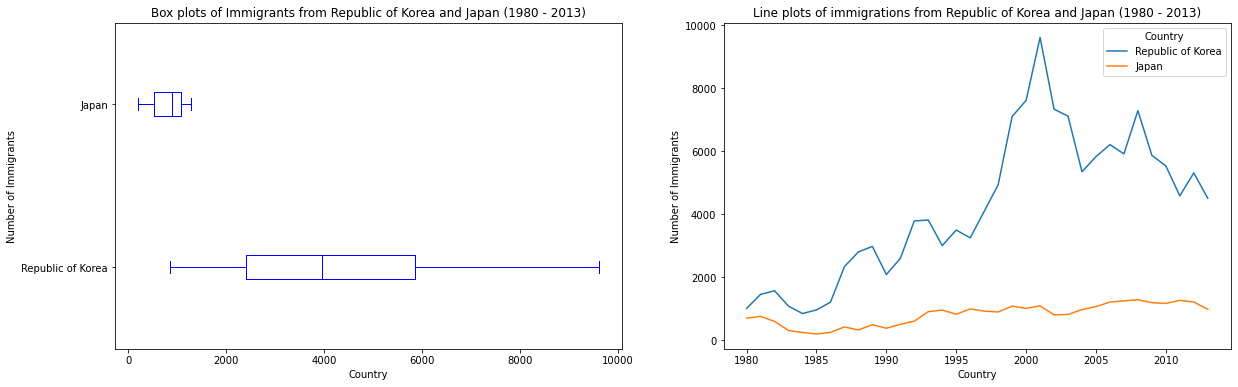

In [15]:
#create figure 
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1) #(1row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) #(1row, 2columns, second plot)

#subplot 1 : Box plot 
df_kj.plot(kind ='box', figsize = (20,6), color = 'blue', vert = False, ax = ax0)
ax0.set_title('Box plots of Immigrants from Republic of Korea and Japan (1980 - 2013)')
ax0.set_xlabel('Country')
ax0.set_ylabel('Number of Immigrants')


#subplot 2 : Line plot
df_kj.plot(kind = 'line', figsize=(20,6), ax = ax1)
ax1.set_title('Line plots of immigrations from Republic of Korea and Japan (1980 - 2013)')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Immigrants')

plt.show()

we can observed that, republic of Korea has about eight times higher mean, minimum and maximum number of immigrant population,
compare to Japan


In [32]:
df_kj.describe()

Country,Republic of Korea,Japan
count,34.000000,34.000000
mean,4193.558824,814.911765
std,2317.158581,337.219771
min,847.000000,198.000000
25%,2403.000000,529.000000
50%,3956.000000,902.000000
75%,5863.500000,1079.000000
max,9619.000000,1284.000000


let's create boxplot to visualize the distribution of the top 15 countries grouped by decades. 

In [33]:
#create dataframe of top 15 countrised based on total immigrant population. 
df_top15 = df.sort_values(by=["total"], ascending = False, axis=0).head(15)
df_top15



,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,482244
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,351846
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,296716
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,285162


In [18]:
#Create list of Years in decades 80s, 90s and 00s. 
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))
#slice the original dataframe df to create a series for each decade and sum across all years for each country.
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

#Merge the three  series into a new data frame call new_df 
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

#display new dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [19]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<AxesSubplot:>

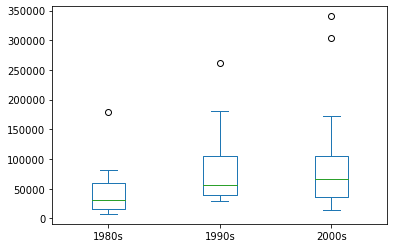

In [20]:
#display as a box plot
new_df.plot(kind='box')

The box plot scans the data and identifies the outliers
Interquartile range(IQR) that are at least 1.5 times larger than Q3 is considered as a outlier
for example in 00s, Q3(75%) = 105,505.5
IQR = Q3(105,505.5) - Q1(36,101.5) = 69,404
Outlier = 105,505.5 + (1.5 * 69,404) = 209,611.5

Let's check hjow many entires fall above the outlier threshold

In [35]:
new_df = new_df.reset_index() 
new_df[new_df['2000s']> 209611.5]

,index,Country,1980s,1990s,2000s
0,0,India,82154,180395,303591
1,1,China,32003,161528,340385


result shows that India and China considered as outliers

Next, Let's visualize the trend of total immigration to Canada for the years 1980 - 2013. 


In [21]:
#total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


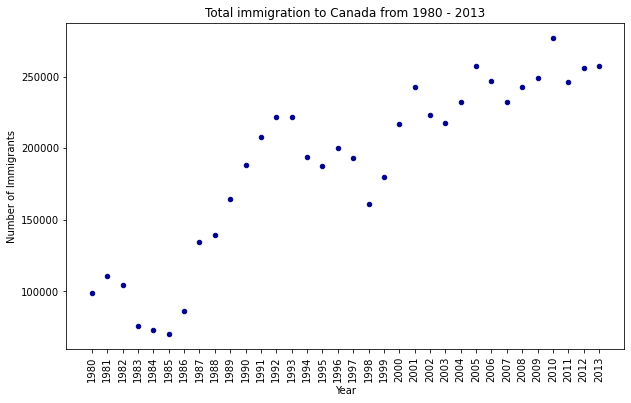

In [22]:
#scatter plot for relationship between years and total immigration 

df_tot.plot(kind='scatter', x= 'year', y='total', figsize=(10,6), color='darkblue', rot=90)

plt.title('Total immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')



plt.show()

we can clearly observe an upward trend in the data therefore, as the years go by, the total number of immigrants increases. 

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [24]:
#transposed dataframe 
df_arg = df[years].transpose()
#Change the index to type int 
df_arg.index = map(int, df_arg.index)
#label index. This will automatically be the column name when we reset the index
df_arg.index.name = 'Year'
#reset index
df_arg.reset_index(inplace=True)
df_arg.head()


Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [25]:
#normalize Brazil Data 
norm_brazil = (df_arg['Brazil'] - df_arg['Brazil'].min()) / (df_arg['Brazil'].max() - df_arg['Brazil'].min())

#normalize Argentina Data
norm_argentina = (df_arg['Argentina'] - df_arg['Argentina'].min()) / (df_arg['Argentina'].max() - df_arg['Argentina'].min())

multiply weights by 2000 and add 10 to compensate from the min value otherwise, the normalized weights won't be visible on the plot

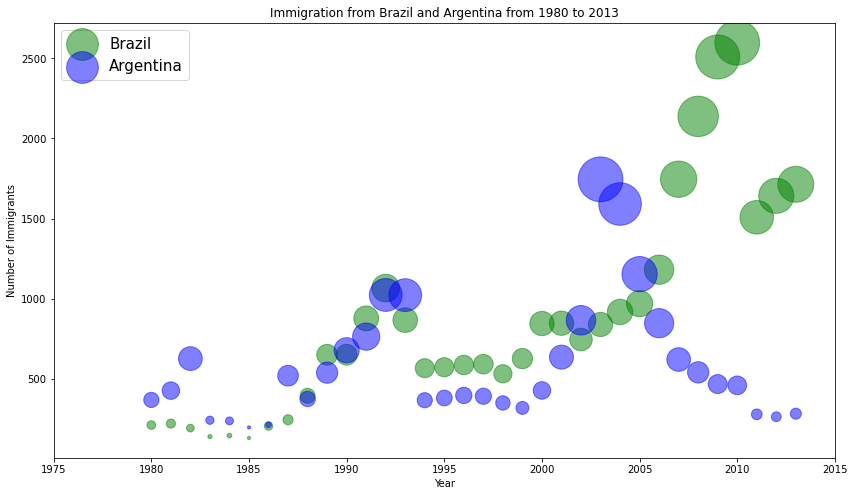

In [26]:
#bubble plot, subplot
# Brazil
ax0 = df_arg.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_arg.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize=15)

Larger the bubble is, the more immigrants are in that year. 
we can observe increase in immigration from Argentina during 1998-2002 great depression, compare to it's neighbour Brazil. 
